### Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
#from sklearn.metrics import classification_report
from sklearn import preprocessing

In [30]:
data= pd.read_csv("Fraud_check.csv")

In [31]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [33]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [34]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad']) 

In [35]:
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status']) 

In [36]:
data[ 'Urban']= label_encoder.fit_transform(data['Urban']) 

In [37]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [38]:
data['Type'] =data['Taxable.Income']

In [39]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Type
0,0,2,68833,50047,10,1,68833
1,1,0,33700,134075,18,1,33700
2,0,1,36925,160205,30,1,36925
3,1,2,50190,193264,15,1,50190
4,0,1,81002,27533,28,0,81002


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital.Status   600 non-null    int64
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int64
 6   Type             600 non-null    int64
dtypes: int64(7)
memory usage: 32.9 KB


In [41]:
for i in range(max(data.shape)):
    if data.iloc[i, 2]<=30000:
        data.iloc[i, -1] = 'Good'
    else: 
        data.iloc[i, -1] = 'Risky'
            
        

In [42]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Type
0,0,2,68833,50047,10,1,Risky
1,1,0,33700,134075,18,1,Risky
2,0,1,36925,160205,30,1,Risky
3,1,2,50190,193264,15,1,Risky
4,0,1,81002,27533,28,0,Risky


In [43]:
data.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Type
595,1,0,76340,39492,7,1,Risky
596,1,0,69967,55369,2,1,Risky
597,0,0,47334,154058,0,1,Risky
598,1,1,98592,180083,17,0,Risky
599,0,0,96519,158137,16,0,Risky


In [44]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Type
0,0,2,68833,50047,10,1,Risky
1,1,0,33700,134075,18,1,Risky
2,0,1,36925,160205,30,1,Risky
3,1,2,50190,193264,15,1,Risky
4,0,1,81002,27533,28,0,Risky
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Risky
596,1,0,69967,55369,2,1,Risky
597,0,0,47334,154058,0,1,Risky
598,1,1,98592,180083,17,0,Risky


In [46]:
data.drop(['Taxable.Income'], axis=1)


,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Type
0,0,2,50047,10,1,Risky
1,1,0,134075,18,1,Risky
2,0,1,160205,30,1,Risky
3,1,2,193264,15,1,Risky
4,0,1,27533,28,0,Risky
...,...,...,...,...,...,...
595,1,0,39492,7,1,Risky
596,1,0,55369,2,1,Risky
597,0,0,154058,0,1,Risky
598,1,1,180083,17,0,Risky


In [47]:
data['Type']= label_encoder.fit_transform(data['Type'])

In [48]:
data.head()


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Type
0,0,2,68833,50047,10,1,1
1,1,0,33700,134075,18,1,1
2,0,1,36925,160205,30,1,1
3,1,2,50190,193264,15,1,1
4,0,1,81002,27533,28,0,1


In [49]:
x=data.iloc[:,0:6]
y=data['Type']

In [50]:
x

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [51]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Type, Length: 600, dtype: int64

In [52]:
y.value_counts()

1    476
0    124
Name: Type, dtype: int64

In [53]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

### Building Decision Tree Classifier using Entropy Criteria

In [58]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

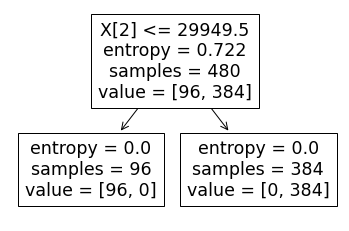

In [59]:
#PLot the decision tree
tree.plot_tree(model);

In [61]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'Type'],
      dtype='object')

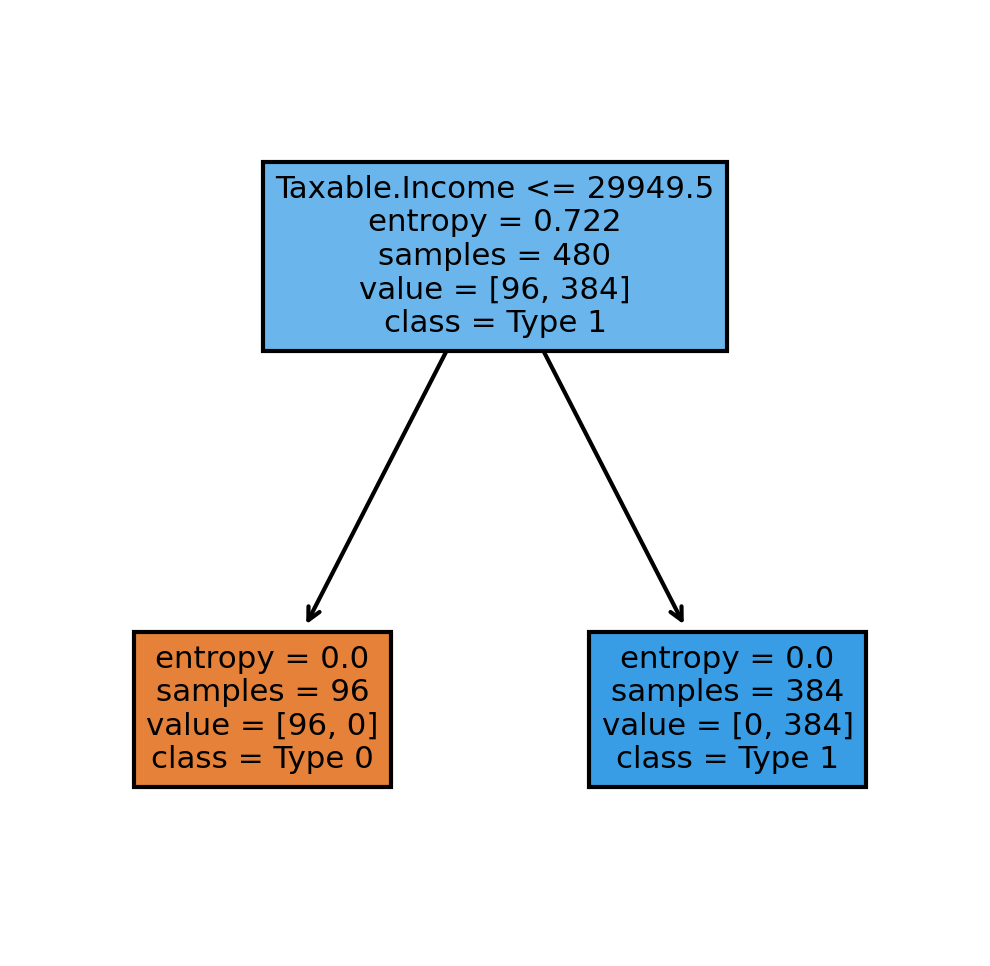

In [62]:
fn=['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban']
cn=['Type 0', 'Type 1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

### Entropy zero means the pure/homogenous region. Here, we got the two pure regions.

In [63]:
pred_train=model.predict(x_train)
pd.crosstab(y_train,pred_train)

col_0,0,1
Type,,
0,96,0
1,0,384


In [64]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    92
0    28
dtype: int64

In [65]:
preds

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [66]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Type,,
0,28,0
1,0,92


In [67]:
# Accuracy 
np.mean(preds==y_test)

1.0

### Building Decision Tree Classifier (CART) using Gini Criteria

In [68]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [69]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [70]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0

### Here, we used decision tree  (CART) with Entropy and Gini criteria for classify the data. Here cluster with name "1" is for taxable_income <= 30000 as "Risky" and cluster "0 " is for "Good".

### Cluster 0 - Good
### Cluster 1 - Risky
